In [1]:
import numpy as np
X= [[150,100],[159,200],[170,350],[175,400],[179,500],[180,180],[189,159],[199,110],[199,400],[199,230],[235,120],[239,340],[239,360],[249,145],[249,400]]
Y= [0.73,1.39,2.03,1.45,1.82,1.32,0.83,0.53,1.95,1.27,0.49,1.03,1.24,0.55,1.3]

In [2]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['Price','AdSpent'])
df1['Sales'] = pd.Series(Y)
df1.tail()

,Price,AdSpent,Sales
10,235,120,0.49
11,239,340,1.03
12,239,360,1.24
13,249,145,0.55
14,249,400,1.30


In [4]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
model = smf.ols(formula='Sales ~ Price + AdSpent',data=df1)
results_formula = model.fit()
results_formula.params

Intercept    1.633842
Price       -0.006379
AdSpent      0.003161
dtype: float64

In [6]:
x_surf, y_surf = np.meshgrid(np.linspace(df1.Price.min(), df1.Price.max(),100), np.linspace(df1.AdSpent.min(),df1.AdSpent.max(),100))

In [7]:
only_x = pd.DataFrame({'Price':x_surf.ravel(), 'AdSpent':y_surf.ravel()})
fitted_y = results_formula.predict(only_x)

In [8]:
fitted_y = np.array(fitted_y)

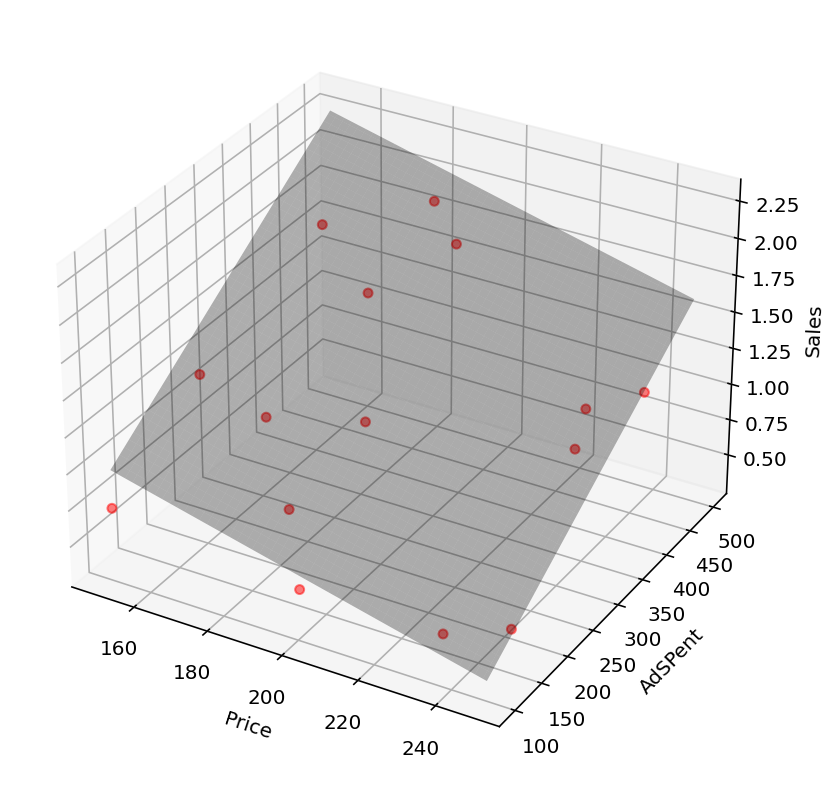

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['Price'], df1['AdSpent'], df1['Sales'], c='red', marker ='o', alpha= 0.5)
ax.plot_surface(x_surf, y_surf, fitted_y.reshape(x_surf.shape), color='none', alpha=0.3)
ax.set_xlabel('Price')
ax.set_ylabel('AdSPent')
ax.set_zlabel('Sales')
plt.show()